In [2]:
from d3rlpy.dataset import Transition
from d3rlpy.algos import DiscreteCQL, DoubleDQN, DiscreteBC

import pickle

import torch
from torch import nn, Tensor
from torch.distributions import Categorical

import numpy as np
import pandas as pd

import gymnasium as gym

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from collections import deque, namedtuple
import random
from copy import deepcopy

/Users/nathandelara/mcgill/u2/comp597-rl/final_project/fin_proj2/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
seed=1
Experience = namedtuple("Experience",field_names=['state','action','reward','next_state','done'])        


class ReplayBuffer():

    

    def __init__(self, action_size, buffer_size, batch_size,seed=seed):


        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        
        self.seed = random.seed(seed)
    def add(self, *args):
        self.memory.append(Experience(*args))
    
    def index(self, idx):
        return self.memory[idx]

    def sample_indexes(self, indexes):
        l = []
        for i in indexes:
              l.append(self.index(i))
        
        l = Experience(*zip(*l))
        return l

    def sample(self):

        experiences = random.sample(self.memory, self.batch_size)
        return experiences
    
    def __len__(self):
        return len(self.memory)
    
    def get_mem(self):
         return self.memory

    def append(self, x):
         self.memory += x.get_mem()

    def cut(self, k):
        self.memory = random.sample( self.memory, k)


In [4]:
def to_transition(x):


    state = x.state[-1]
    action = x.action[-1]
    state_prime =  x.next_state
    reward = x.reward[-1]
    terminal = x.done


    tr = Transition([2],2, np.array(state), action, reward, np.array(state_prime), terminal)

    return tr

In [5]:
data = pickle.load(open('cql_data_buffer.pkl','rb'))

In [6]:
d2 = pickle.load(open('cql_data_fully_observing_buffer.pkl','rb'))
d2.cut(len(data))

In [7]:


def train_cql(mem):



    trans = [to_transition(x) for x in mem]


    cql = DiscreteCQL()
    cql.fit(trans, n_epochs=10)

    return cql

def train_ddqn(mem):



    trans = [to_transition(x) for x in mem]


    ddqn = DoubleDQN()
    ddqn.fit(trans, n_epochs=10)

    return ddqn



In [8]:

def train_bc(mem):



    trans = [to_transition(x) for x in mem]


    dbc = DiscreteBC(learning_rate=1e-4)
    dbc.fit(trans, n_epochs=10)

    return dbc

In [9]:
mem = list(data.get_mem())
mem2 = list(d2.get_mem())

mm2 = mem[:int(len(data)/2)] + mem2[:int(len(mem2)/2)]

In [10]:
cql_10 = train_cql(mem)

2023-04-29 14:30:30 [debug    ] RoundIterator is selected.
2023-04-29 14:30:30 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20230429143030
2023-04-29 14:30:30 [debug    ] Building models...
2023-04-29 14:30:30 [debug    ] Models have been built.
2023-04-29 14:30:30 [info     ] Parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DiscreteCQL', 'observation

Epoch 1/10: 100%|██████████| 31030/31030 [02:07<00:00, 242.79it/s, loss=0.196]


2023-04-29 14:32:38 [info     ] DiscreteCQL_20230429143030: epoch=1 step=31030 epoch=1 metrics={'time_sample_batch': 0.00011442812496410276, 'time_algorithm_update': 0.003660439937836195, 'loss': 0.19594428588438428, 'time_step': 0.004070465348821819} step=31030
2023-04-29 14:32:38 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_31030.pt


Epoch 2/10: 100%|██████████| 31030/31030 [02:05<00:00, 246.58it/s, loss=0.177]


2023-04-29 14:34:44 [info     ] DiscreteCQL_20230429143030: epoch=2 step=62060 epoch=2 metrics={'time_sample_batch': 0.0001041029639064286, 'time_algorithm_update': 0.003599894404065559, 'loss': 0.17699209821611267, 'time_step': 0.004007663474788291} step=62060
2023-04-29 14:34:44 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_62060.pt


Epoch 3/10: 100%|██████████| 31030/31030 [02:07<00:00, 243.19it/s, loss=0.274]


2023-04-29 14:36:51 [info     ] DiscreteCQL_20230429143030: epoch=3 step=93090 epoch=3 metrics={'time_sample_batch': 9.965218154607264e-05, 'time_algorithm_update': 0.0036467179074965096, 'loss': 0.27408850738767304, 'time_step': 0.004063227251196077} step=93090
2023-04-29 14:36:52 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_93090.pt


Epoch 4/10: 100%|██████████| 31030/31030 [02:06<00:00, 245.73it/s, loss=0.39] 


2023-04-29 14:38:58 [info     ] DiscreteCQL_20230429143030: epoch=4 step=124120 epoch=4 metrics={'time_sample_batch': 9.929507615448696e-05, 'time_algorithm_update': 0.0036010377990250584, 'loss': 0.3896386026594184, 'time_step': 0.004021744224051679} step=124120
2023-04-29 14:38:58 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_124120.pt


Epoch 5/10: 100%|██████████| 31030/31030 [02:07<00:00, 243.60it/s, loss=0.511]


2023-04-29 14:41:05 [info     ] DiscreteCQL_20230429143030: epoch=5 step=155150 epoch=5 metrics={'time_sample_batch': 9.869833050948207e-05, 'time_algorithm_update': 0.003635568008705604, 'loss': 0.5107126412886192, 'time_step': 0.004056896688551662} step=155150
2023-04-29 14:41:05 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_155150.pt


Epoch 6/10: 100%|██████████| 31030/31030 [02:07<00:00, 243.82it/s, loss=0.591]


2023-04-29 14:43:13 [info     ] DiscreteCQL_20230429143030: epoch=6 step=186180 epoch=6 metrics={'time_sample_batch': 9.824668750277343e-05, 'time_algorithm_update': 0.003632856982775438, 'loss': 0.5914796540857591, 'time_step': 0.004053156021676292} step=186180
2023-04-29 14:43:13 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_186180.pt


Epoch 7/10: 100%|██████████| 31030/31030 [02:13<00:00, 232.86it/s, loss=0.632]


2023-04-29 14:45:26 [info     ] DiscreteCQL_20230429143030: epoch=7 step=217210 epoch=7 metrics={'time_sample_batch': 0.00010125747696645714, 'time_algorithm_update': 0.0038179642532550247, 'loss': 0.6317184894986492, 'time_step': 0.004244224448147183} step=217210
2023-04-29 14:45:26 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_217210.pt


Epoch 8/10: 100%|██████████| 31030/31030 [02:16<00:00, 227.57it/s, loss=0.642]


2023-04-29 14:47:42 [info     ] DiscreteCQL_20230429143030: epoch=8 step=248240 epoch=8 metrics={'time_sample_batch': 0.00010118090334224425, 'time_algorithm_update': 0.0039126045812225094, 'loss': 0.6417340593422723, 'time_step': 0.004342167123148528} step=248240
2023-04-29 14:47:42 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_248240.pt


Epoch 9/10: 100%|██████████| 31030/31030 [02:16<00:00, 228.04it/s, loss=0.668]


2023-04-29 14:49:59 [info     ] DiscreteCQL_20230429143030: epoch=9 step=279270 epoch=9 metrics={'time_sample_batch': 0.00010255245174318216, 'time_algorithm_update': 0.003911054207362016, 'loss': 0.6679839338222473, 'time_step': 0.004334298872079459} step=279270
2023-04-29 14:49:59 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_279270.pt


Epoch 10/10: 100%|██████████| 31030/31030 [02:10<00:00, 237.62it/s, loss=0.704]


2023-04-29 14:52:09 [info     ] DiscreteCQL_20230429143030: epoch=10 step=310300 epoch=10 metrics={'time_sample_batch': 9.93504126226368e-05, 'time_algorithm_update': 0.003743168411045892, 'loss': 0.7043789748170858, 'time_step': 0.004159345082840226} step=310300
2023-04-29 14:52:09 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429143030/model_310300.pt


In [11]:
cql_11 = train_cql(mm2)

2023-04-29 14:52:14 [debug    ] RoundIterator is selected.
2023-04-29 14:52:14 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20230429145214
2023-04-29 14:52:14 [debug    ] Building models...
2023-04-29 14:52:14 [debug    ] Models have been built.
2023-04-29 14:52:14 [info     ] Parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DiscreteCQL', 'observation

Epoch 1/10: 100%|██████████| 31030/31030 [02:23<00:00, 215.80it/s, loss=0.508]


2023-04-29 14:54:38 [info     ] DiscreteCQL_20230429145214: epoch=1 step=31030 epoch=1 metrics={'time_sample_batch': 0.00010660204855119495, 'time_algorithm_update': 0.004141143787456565, 'loss': 0.5081696902143928, 'time_step': 0.004579282728964153} step=31030
2023-04-29 14:54:38 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_31030.pt


Epoch 2/10: 100%|██████████| 31030/31030 [01:59<00:00, 258.97it/s, loss=0.522]


2023-04-29 14:56:38 [info     ] DiscreteCQL_20230429145214: epoch=2 step=62060 epoch=2 metrics={'time_sample_batch': 9.559505492151072e-05, 'time_algorithm_update': 0.003406839127929373, 'loss': 0.5215982757160597, 'time_step': 0.003815324868150884} step=62060
2023-04-29 14:56:38 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_62060.pt


Epoch 3/10: 100%|██████████| 31030/31030 [02:04<00:00, 250.01it/s, loss=0.602]


2023-04-29 14:58:42 [info     ] DiscreteCQL_20230429145214: epoch=3 step=93090 epoch=3 metrics={'time_sample_batch': 9.621503542901008e-05, 'time_algorithm_update': 0.0035325804104007446, 'loss': 0.6022605255289382, 'time_step': 0.003952617780493031} step=93090
2023-04-29 14:58:42 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_93090.pt


Epoch 4/10: 100%|██████████| 31030/31030 [02:06<00:00, 246.13it/s, loss=0.687]


2023-04-29 15:00:48 [info     ] DiscreteCQL_20230429145214: epoch=4 step=124120 epoch=4 metrics={'time_sample_batch': 9.687443222109825e-05, 'time_algorithm_update': 0.00359158785620544, 'loss': 0.6871612731090023, 'time_step': 0.004014102743396519} step=124120
2023-04-29 15:00:48 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_124120.pt


Epoch 5/10: 100%|██████████| 31030/31030 [02:08<00:00, 242.14it/s, loss=0.768]


2023-04-29 15:02:56 [info     ] DiscreteCQL_20230429145214: epoch=5 step=155150 epoch=5 metrics={'time_sample_batch': 9.665322465125185e-05, 'time_algorithm_update': 0.0036582868713123198, 'loss': 0.7680480153232938, 'time_step': 0.004080246757239324} step=155150
2023-04-29 15:02:56 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_155150.pt


Epoch 6/10: 100%|██████████| 31030/31030 [02:08<00:00, 240.96it/s, loss=0.833]


2023-04-29 15:05:05 [info     ] DiscreteCQL_20230429145214: epoch=6 step=186180 epoch=6 metrics={'time_sample_batch': 9.87873974823775e-05, 'time_algorithm_update': 0.0036748626406562356, 'loss': 0.8334992024347623, 'time_step': 0.0041010056931166505} step=186180
2023-04-29 15:05:05 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_186180.pt


Epoch 7/10: 100%|██████████| 31030/31030 [02:11<00:00, 235.09it/s, loss=0.878]


2023-04-29 15:07:17 [info     ] DiscreteCQL_20230429145214: epoch=7 step=217210 epoch=7 metrics={'time_sample_batch': 0.00010232922341644553, 'time_algorithm_update': 0.003777638113272025, 'loss': 0.8780248181928637, 'time_step': 0.004203386626395724} step=217210
2023-04-29 15:07:17 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_217210.pt


Epoch 8/10: 100%|██████████| 31030/31030 [02:12<00:00, 233.86it/s, loss=0.927]


2023-04-29 15:09:30 [info     ] DiscreteCQL_20230429145214: epoch=8 step=248240 epoch=8 metrics={'time_sample_batch': 0.00010264659750050512, 'time_algorithm_update': 0.003796097151202768, 'loss': 0.9270391909107254, 'time_step': 0.0042251530209933795} step=248240
2023-04-29 15:09:30 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_248240.pt


Epoch 9/10: 100%|██████████| 31030/31030 [02:11<00:00, 235.36it/s, loss=0.972]


2023-04-29 15:11:42 [info     ] DiscreteCQL_20230429145214: epoch=9 step=279270 epoch=9 metrics={'time_sample_batch': 0.0001017336379778681, 'time_algorithm_update': 0.0037745571889456265, 'loss': 0.9722608224474688, 'time_step': 0.004198736480617001} step=279270
2023-04-29 15:11:42 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_279270.pt


Epoch 10/10: 100%|██████████| 31030/31030 [02:11<00:00, 235.53it/s, loss=1.02]


2023-04-29 15:13:54 [info     ] DiscreteCQL_20230429145214: epoch=10 step=310300 epoch=10 metrics={'time_sample_batch': 0.00010093674519889554, 'time_algorithm_update': 0.003772616232743849, 'loss': 1.0154986947717262, 'time_step': 0.004195831669479503} step=310300
2023-04-29 15:13:54 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429145214/model_310300.pt


In [33]:
cql_01 = train_cql(mem2)

2023-04-29 17:39:33 [debug    ] RoundIterator is selected.
2023-04-29 17:39:33 [info     ] Directory is created at d3rlpy_logs/DiscreteCQL_20230429173933
2023-04-29 17:39:33 [debug    ] Building models...
2023-04-29 17:39:33 [debug    ] Models have been built.
2023-04-29 17:39:33 [info     ] Parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/params.json params={'action_scaler': None, 'alpha': 1.0, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DiscreteCQL', 'observation

Epoch 1/10: 100%|██████████| 31030/31030 [02:15<00:00, 229.66it/s, loss=0.697]


2023-04-29 17:41:48 [info     ] DiscreteCQL_20230429173933: epoch=1 step=31030 epoch=1 metrics={'time_sample_batch': 0.000103112516424712, 'time_algorithm_update': 0.0038691214964999103, 'loss': 0.6967529870504876, 'time_step': 0.004302359426401908} step=31030
2023-04-29 17:41:48 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_31030.pt


Epoch 2/10: 100%|██████████| 31030/31030 [02:14<00:00, 230.33it/s, loss=0.703]


2023-04-29 17:44:03 [info     ] DiscreteCQL_20230429173933: epoch=2 step=62060 epoch=2 metrics={'time_sample_batch': 0.00010335619819191169, 'time_algorithm_update': 0.0038598725920986677, 'loss': 0.7031548188034658, 'time_step': 0.004289331007418693} step=62060
2023-04-29 17:44:03 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_62060.pt


Epoch 3/10: 100%|██████████| 31030/31030 [02:17<00:00, 225.82it/s, loss=0.71] 


2023-04-29 17:46:21 [info     ] DiscreteCQL_20230429173933: epoch=3 step=93090 epoch=3 metrics={'time_sample_batch': 0.00010017938395680592, 'time_algorithm_update': 0.003945223615894078, 'loss': 0.7100023675110891, 'time_step': 0.004374882992797616} step=93090
2023-04-29 17:46:21 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_93090.pt


Epoch 4/10: 100%|██████████| 31030/31030 [02:19<00:00, 222.48it/s, loss=0.717]


2023-04-29 17:48:40 [info     ] DiscreteCQL_20230429173933: epoch=4 step=124120 epoch=4 metrics={'time_sample_batch': 9.999904485045423e-05, 'time_algorithm_update': 0.004003219576831637, 'loss': 0.7167612637679807, 'time_step': 0.004439809650442042} step=124120
2023-04-29 17:48:40 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_124120.pt


Epoch 5/10: 100%|██████████| 31030/31030 [02:21<00:00, 219.82it/s, loss=0.724]


2023-04-29 17:51:02 [info     ] DiscreteCQL_20230429173933: epoch=5 step=155150 epoch=5 metrics={'time_sample_batch': 9.911631216282157e-05, 'time_algorithm_update': 0.004057934696813418, 'loss': 0.7235406541782081, 'time_step': 0.004494353374895494} step=155150
2023-04-29 17:51:02 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_155150.pt


Epoch 6/10: 100%|██████████| 31030/31030 [02:25<00:00, 212.68it/s, loss=0.73] 


2023-04-29 17:53:28 [info     ] DiscreteCQL_20230429173933: epoch=6 step=186180 epoch=6 metrics={'time_sample_batch': 0.00010037477501276959, 'time_algorithm_update': 0.004194262271306993, 'loss': 0.7302192400049633, 'time_step': 0.004641262838773638} step=186180
2023-04-29 17:53:28 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_186180.pt


Epoch 7/10: 100%|██████████| 31030/31030 [02:19<00:00, 222.16it/s, loss=0.736]


2023-04-29 17:55:47 [info     ] DiscreteCQL_20230429173933: epoch=7 step=217210 epoch=7 metrics={'time_sample_batch': 9.674040917000999e-05, 'time_algorithm_update': 0.004015754147418038, 'loss': 0.7359921672057613, 'time_step': 0.004446695068364292} step=217210
2023-04-29 17:55:47 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_217210.pt


Epoch 8/10: 100%|██████████| 31030/31030 [02:21<00:00, 219.90it/s, loss=0.742]


2023-04-29 17:58:08 [info     ] DiscreteCQL_20230429173933: epoch=8 step=248240 epoch=8 metrics={'time_sample_batch': 9.652010056805772e-05, 'time_algorithm_update': 0.0040585549385594505, 'loss': 0.7416873283955577, 'time_step': 0.0044920649176599745} step=248240
2023-04-29 17:58:08 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_248240.pt


Epoch 9/10: 100%|██████████| 31030/31030 [02:20<00:00, 220.31it/s, loss=0.748]


2023-04-29 18:00:29 [info     ] DiscreteCQL_20230429173933: epoch=9 step=279270 epoch=9 metrics={'time_sample_batch': 9.82210246586162e-05, 'time_algorithm_update': 0.004044931110857842, 'loss': 0.7484813643854125, 'time_step': 0.004483586728399967} step=279270
2023-04-29 18:00:29 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_279270.pt


Epoch 10/10: 100%|██████████| 31030/31030 [02:21<00:00, 219.47it/s, loss=0.753]


2023-04-29 18:02:51 [info     ] DiscreteCQL_20230429173933: epoch=10 step=310300 epoch=10 metrics={'time_sample_batch': 9.554583450843548e-05, 'time_algorithm_update': 0.004067506968418014, 'loss': 0.7529704063372039, 'time_step': 0.004501474283988577} step=310300
2023-04-29 18:02:51 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteCQL_20230429173933/model_310300.pt


In [13]:
ddqn_10 = train_ddqn(mem)

2023-04-29 15:35:42 [debug    ] RoundIterator is selected.
2023-04-29 15:35:42 [info     ] Directory is created at d3rlpy_logs/DoubleDQN_20230429153542
2023-04-29 15:35:42 [debug    ] Building models...
2023-04-29 15:35:42 [debug    ] Models have been built.
2023-04-29 15:35:42 [info     ] Parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/params.json params={'action_scaler': None, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DoubleDQN', 'observation_shape': (2,), 'acti

Epoch 1/10: 100%|██████████| 31030/31030 [01:23<00:00, 372.24it/s, loss=0.0337] 


2023-04-29 15:37:05 [info     ] DoubleDQN_20230429153542: epoch=1 step=31030 epoch=1 metrics={'time_sample_batch': 9.116580937318251e-05, 'time_algorithm_update': 0.0022463684807352354, 'loss': 0.03367120438461068, 'time_step': 0.0026530085476682602} step=31030
2023-04-29 15:37:06 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_31030.pt


Epoch 2/10: 100%|██████████| 31030/31030 [01:24<00:00, 369.22it/s, loss=0.146]


2023-04-29 15:38:30 [info     ] DoubleDQN_20230429153542: epoch=2 step=62060 epoch=2 metrics={'time_sample_batch': 9.118620902924165e-05, 'time_algorithm_update': 0.0022654758281873727, 'loss': 0.14613135900411678, 'time_step': 0.0026750417129093704} step=62060
2023-04-29 15:38:30 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_62060.pt


Epoch 3/10: 100%|██████████| 31030/31030 [01:25<00:00, 361.82it/s, loss=0.262]


2023-04-29 15:39:55 [info     ] DoubleDQN_20230429153542: epoch=3 step=93090 epoch=3 metrics={'time_sample_batch': 9.114357336390376e-05, 'time_algorithm_update': 0.002316680324872847, 'loss': 0.26183395114831765, 'time_step': 0.002729811270391407} step=93090
2023-04-29 15:39:55 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_93090.pt


Epoch 4/10: 100%|██████████| 31030/31030 [01:27<00:00, 356.39it/s, loss=0.364]


2023-04-29 15:41:23 [info     ] DoubleDQN_20230429153542: epoch=4 step=124120 epoch=4 metrics={'time_sample_batch': 9.131978643812596e-05, 'time_algorithm_update': 0.0023591397771365098, 'loss': 0.36422170068530824, 'time_step': 0.002771456280793446} step=124120
2023-04-29 15:41:23 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_124120.pt


Epoch 5/10: 100%|██████████| 31030/31030 [01:27<00:00, 356.07it/s, loss=0.444]


2023-04-29 15:42:50 [info     ] DoubleDQN_20230429153542: epoch=5 step=155150 epoch=5 metrics={'time_sample_batch': 9.140167703484091e-05, 'time_algorithm_update': 0.0023621395792148207, 'loss': 0.44414438795354766, 'time_step': 0.0027743009609673586} step=155150
2023-04-29 15:42:50 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_155150.pt


Epoch 6/10: 100%|██████████| 31030/31030 [01:27<00:00, 355.27it/s, loss=0.509]


2023-04-29 15:44:17 [info     ] DoubleDQN_20230429153542: epoch=6 step=186180 epoch=6 metrics={'time_sample_batch': 9.119546763020257e-05, 'time_algorithm_update': 0.0023683485967898577, 'loss': 0.5091993765174968, 'time_step': 0.002779904496773496} step=186180
2023-04-29 15:44:17 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_186180.pt


Epoch 7/10: 100%|██████████| 31030/31030 [01:27<00:00, 353.28it/s, loss=0.589]


2023-04-29 15:45:45 [info     ] DoubleDQN_20230429153542: epoch=7 step=217210 epoch=7 metrics={'time_sample_batch': 9.163391809097767e-05, 'time_algorithm_update': 0.0023833040648646945, 'loss': 0.5886827955582509, 'time_step': 0.0027961870412307136} step=217210
2023-04-29 15:45:45 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_217210.pt


Epoch 8/10: 100%|██████████| 31030/31030 [01:27<00:00, 354.58it/s, loss=0.669]


2023-04-29 15:47:13 [info     ] DoubleDQN_20230429153542: epoch=8 step=248240 epoch=8 metrics={'time_sample_batch': 9.119902508434772e-05, 'time_algorithm_update': 0.0023743507057630052, 'loss': 0.6690982896547681, 'time_step': 0.002786010048522359} step=248240
2023-04-29 15:47:13 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_248240.pt


Epoch 9/10: 100%|██████████| 31030/31030 [01:27<00:00, 352.91it/s, loss=0.737]


2023-04-29 15:48:41 [info     ] DoubleDQN_20230429153542: epoch=9 step=279270 epoch=9 metrics={'time_sample_batch': 9.102152118443137e-05, 'time_algorithm_update': 0.0023872237185528305, 'loss': 0.7367391026163155, 'time_step': 0.0027994084581036433} step=279270
2023-04-29 15:48:41 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_279270.pt


Epoch 10/10: 100%|██████████| 31030/31030 [02:27<00:00, 210.16it/s, loss=0.747]


2023-04-29 15:51:09 [info     ] DoubleDQN_20230429153542: epoch=10 step=310300 epoch=10 metrics={'time_sample_batch': 0.00012175131720033647, 'time_algorithm_update': 0.004153650782010726, 'loss': 0.7469617055940928, 'time_step': 0.004694132861728404} step=310300
2023-04-29 15:51:09 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429153542/model_310300.pt


In [14]:
ddqn_11 = train_ddqn(mm2)

2023-04-29 15:51:14 [debug    ] RoundIterator is selected.
2023-04-29 15:51:14 [info     ] Directory is created at d3rlpy_logs/DoubleDQN_20230429155114
2023-04-29 15:51:14 [debug    ] Building models...
2023-04-29 15:51:14 [debug    ] Models have been built.
2023-04-29 15:51:14 [info     ] Parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/params.json params={'action_scaler': None, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DoubleDQN', 'observation_shape': (2,), 'acti

Epoch 1/10: 100%|██████████| 31030/31030 [02:32<00:00, 203.11it/s, loss=0.0216] 


2023-04-29 15:53:47 [info     ] DoubleDQN_20230429155114: epoch=1 step=31030 epoch=1 metrics={'time_sample_batch': 0.00012912507445974347, 'time_algorithm_update': 0.004296402895869342, 'loss': 0.02158606306149723, 'time_step': 0.004847700980798376} step=31030
2023-04-29 15:53:47 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_31030.pt


Epoch 2/10: 100%|██████████| 31030/31030 [02:35<00:00, 199.77it/s, loss=0.0842]


2023-04-29 15:56:23 [info     ] DoubleDQN_20230429155114: epoch=2 step=62060 epoch=2 metrics={'time_sample_batch': 0.00012883405473360584, 'time_algorithm_update': 0.004379403087887655, 'loss': 0.0842345870498395, 'time_step': 0.0049306595436880525} step=62060
2023-04-29 15:56:23 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_62060.pt


Epoch 3/10: 100%|██████████| 31030/31030 [02:40<00:00, 193.58it/s, loss=0.157]


2023-04-29 15:59:03 [info     ] DoubleDQN_20230429155114: epoch=3 step=93090 epoch=3 metrics={'time_sample_batch': 0.0001289898374178238, 'time_algorithm_update': 0.004540662276833202, 'loss': 0.15736694312194946, 'time_step': 0.005093951621748654} step=93090
2023-04-29 15:59:03 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_93090.pt


Epoch 4/10: 100%|██████████| 31030/31030 [02:42<00:00, 191.32it/s, loss=0.237]


2023-04-29 16:01:45 [info     ] DoubleDQN_20230429155114: epoch=4 step=124120 epoch=4 metrics={'time_sample_batch': 0.00012946072755765038, 'time_algorithm_update': 0.0045981859569199195, 'loss': 0.23745472731260517, 'time_step': 0.005154042677306145} step=124120
2023-04-29 16:01:45 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_124120.pt


Epoch 5/10: 100%|██████████| 31030/31030 [03:24<00:00, 152.04it/s, loss=0.3]  


2023-04-29 16:05:10 [info     ] DoubleDQN_20230429155114: epoch=5 step=155150 epoch=5 metrics={'time_sample_batch': 0.0003841766725614537, 'time_algorithm_update': 0.004693759997506469, 'loss': 0.3002871020506921, 'time_step': 0.0064992270391293966} step=155150
2023-04-29 16:05:10 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_155150.pt


Epoch 6/10: 100%|██████████| 31030/31030 [09:49<00:00, 52.66it/s, loss=0.352] 


2023-04-29 16:14:59 [info     ] DoubleDQN_20230429155114: epoch=6 step=186180 epoch=6 metrics={'time_sample_batch': 0.0006045520055920241, 'time_algorithm_update': 0.01783718126188199, 'loss': 0.35238227451636145, 'time_step': 0.018891256346535077} step=186180
2023-04-29 16:14:59 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_186180.pt


Epoch 7/10: 100%|██████████| 31030/31030 [02:27<00:00, 210.94it/s, loss=0.404]


2023-04-29 16:17:26 [info     ] DoubleDQN_20230429155114: epoch=7 step=217210 epoch=7 metrics={'time_sample_batch': 0.0001527107956714489, 'time_algorithm_update': 0.004139339021049005, 'loss': 0.40382459085345235, 'time_step': 0.004670744567696525} step=217210
2023-04-29 16:17:26 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_217210.pt


Epoch 8/10: 100%|██████████| 31030/31030 [01:30<00:00, 341.75it/s, loss=0.442]


2023-04-29 16:18:57 [info     ] DoubleDQN_20230429155114: epoch=8 step=248240 epoch=8 metrics={'time_sample_batch': 9.892570023532072e-05, 'time_algorithm_update': 0.002484806452956155, 'loss': 0.4422394664467997, 'time_step': 0.002890594828486097} step=248240
2023-04-29 16:18:57 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_248240.pt


Epoch 9/10: 100%|██████████| 31030/31030 [01:32<00:00, 336.29it/s, loss=0.498]


2023-04-29 16:20:30 [info     ] DoubleDQN_20230429155114: epoch=9 step=279270 epoch=9 metrics={'time_sample_batch': 9.707100653394822e-05, 'time_algorithm_update': 0.002526668245239946, 'loss': 0.4983242411952186, 'time_step': 0.002936862746708016} step=279270
2023-04-29 16:20:30 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_279270.pt


Epoch 10/10: 100%|██████████| 31030/31030 [01:34<00:00, 327.86it/s, loss=0.591]


2023-04-29 16:22:04 [info     ] DoubleDQN_20230429155114: epoch=10 step=310300 epoch=10 metrics={'time_sample_batch': 9.608936432750234e-05, 'time_algorithm_update': 0.0025967183744680716, 'loss': 0.5909915836651, 'time_step': 0.003012603119884888} step=310300
2023-04-29 16:22:04 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429155114/model_310300.pt


In [15]:
ddqn_01 = train_ddqn(mem2)

2023-04-29 16:22:27 [debug    ] RoundIterator is selected.
2023-04-29 16:22:27 [info     ] Directory is created at d3rlpy_logs/DoubleDQN_20230429162227
2023-04-29 16:22:27 [debug    ] Building models...
2023-04-29 16:22:27 [debug    ] Models have been built.
2023-04-29 16:22:27 [info     ] Parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/params.json params={'action_scaler': None, 'batch_size': 32, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 0.99, 'generated_maxlen': 100000, 'learning_rate': 6.25e-05, 'n_critics': 1, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'q_func_factory': {'type': 'mean', 'params': {'share_encoder': False}}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'target_update_interval': 8000, 'use_gpu': None, 'algorithm': 'DoubleDQN', 'observation_shape': (2,), 'acti

Epoch 1/10: 100%|██████████| 31030/31030 [01:28<00:00, 349.56it/s, loss=0.00422]


2023-04-29 16:23:56 [info     ] DoubleDQN_20230429162227: epoch=1 step=31030 epoch=1 metrics={'time_sample_batch': 9.287397130781168e-05, 'time_algorithm_update': 0.002415872887953458, 'loss': 0.00422055020380791, 'time_step': 0.002824943049507989} step=31030
2023-04-29 16:23:56 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_31030.pt


Epoch 2/10: 100%|██████████| 31030/31030 [01:34<00:00, 329.70it/s, loss=0.00976]


2023-04-29 16:25:30 [info     ] DoubleDQN_20230429162227: epoch=2 step=62060 epoch=2 metrics={'time_sample_batch': 9.575201317912873e-05, 'time_algorithm_update': 0.002578483241010857, 'loss': 0.00975406568491086, 'time_step': 0.0029944322203729295} step=62060
2023-04-29 16:25:30 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_62060.pt


Epoch 3/10: 100%|██████████| 31030/31030 [01:29<00:00, 346.48it/s, loss=0.0169]


2023-04-29 16:26:59 [info     ] DoubleDQN_20230429162227: epoch=3 step=93090 epoch=3 metrics={'time_sample_batch': 9.115620501533924e-05, 'time_algorithm_update': 0.002445564744858983, 'loss': 0.016911206239976048, 'time_step': 0.00285105949596094} step=93090
2023-04-29 16:26:59 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_93090.pt


Epoch 4/10: 100%|██████████| 31030/31030 [01:31<00:00, 340.81it/s, loss=0.0237]


2023-04-29 16:28:31 [info     ] DoubleDQN_20230429162227: epoch=4 step=124120 epoch=4 metrics={'time_sample_batch': 9.174165593552043e-05, 'time_algorithm_update': 0.0024879005237275695, 'loss': 0.023691736998896498, 'time_step': 0.0028985238712985707} step=124120
2023-04-29 16:28:31 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_124120.pt


Epoch 5/10: 100%|██████████| 31030/31030 [01:31<00:00, 338.30it/s, loss=0.0302]


2023-04-29 16:30:02 [info     ] DoubleDQN_20230429162227: epoch=5 step=155150 epoch=5 metrics={'time_sample_batch': 9.220057520373114e-05, 'time_algorithm_update': 0.0025076520085680534, 'loss': 0.030215209592380048, 'time_step': 0.0029196800049988638} step=155150
2023-04-29 16:30:02 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_155150.pt


Epoch 6/10: 100%|██████████| 31030/31030 [01:31<00:00, 339.04it/s, loss=0.0365]


2023-04-29 16:31:34 [info     ] DoubleDQN_20230429162227: epoch=6 step=186180 epoch=6 metrics={'time_sample_batch': 9.348304126480108e-05, 'time_algorithm_update': 0.002498792572402585, 'loss': 0.036493314728888476, 'time_step': 0.002913359161964586} step=186180
2023-04-29 16:31:34 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_186180.pt


Epoch 7/10: 100%|██████████| 31030/31030 [01:32<00:00, 336.71it/s, loss=0.0426]


2023-04-29 16:33:06 [info     ] DoubleDQN_20230429162227: epoch=7 step=217210 epoch=7 metrics={'time_sample_batch': 9.151012176012094e-05, 'time_algorithm_update': 0.0025207877504875536, 'loss': 0.04262815804088402, 'time_step': 0.0029335310257061274} step=217210
2023-04-29 16:33:06 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_217210.pt


Epoch 8/10: 100%|██████████| 31030/31030 [01:31<00:00, 340.05it/s, loss=0.0485]


2023-04-29 16:34:37 [info     ] DoubleDQN_20230429162227: epoch=8 step=248240 epoch=8 metrics={'time_sample_batch': 9.153837393915273e-05, 'time_algorithm_update': 0.0024910304840633727, 'loss': 0.04850549309350535, 'time_step': 0.002903525774762433} step=248240
2023-04-29 16:34:37 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_248240.pt


Epoch 9/10: 100%|██████████| 31030/31030 [01:32<00:00, 336.52it/s, loss=0.0542]


2023-04-29 16:36:10 [info     ] DoubleDQN_20230429162227: epoch=9 step=279270 epoch=9 metrics={'time_sample_batch': 9.175624687595595e-05, 'time_algorithm_update': 0.0025213305811093694, 'loss': 0.05415236951252971, 'time_step': 0.002935330890049444} step=279270
2023-04-29 16:36:10 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_279270.pt


Epoch 10/10: 100%|██████████| 31030/31030 [01:32<00:00, 336.93it/s, loss=0.0596]


2023-04-29 16:37:42 [info     ] DoubleDQN_20230429162227: epoch=10 step=310300 epoch=10 metrics={'time_sample_batch': 9.22506408002966e-05, 'time_algorithm_update': 0.002517748032698046, 'loss': 0.05963263140782997, 'time_step': 0.00293206251939189} step=310300
2023-04-29 16:37:42 [info     ] Model parameters are saved to d3rlpy_logs/DoubleDQN_20230429162227/model_310300.pt


In [16]:
bc_01 = train_bc(mem2)

2023-04-29 16:37:46 [debug    ] RoundIterator is selected.
2023-04-29 16:37:46 [info     ] Directory is created at d3rlpy_logs/DiscreteBC_20230429163746
2023-04-29 16:37:46 [debug    ] Building models...
2023-04-29 16:37:46 [debug    ] Models have been built.
2023-04-29 16:37:46 [info     ] Parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/params.json params={'action_scaler': None, 'batch_size': 100, 'beta': 0.5, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 1.0, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'use_gpu': None, 'algorithm': 'DiscreteBC', 'observation_shape': (2,), 'action_size': 2}


Epoch 1/10: 100%|██████████| 9929/9929 [00:26<00:00, 369.97it/s, loss=0.693]

2023-04-29 16:38:13 [info     ] DiscreteBC_20230429163746: epoch=1 step=9929 epoch=1 metrics={'time_sample_batch': 0.0002005981503326327, 'time_algorithm_update': 0.002285611630686701, 'loss': 0.6932947581562826, 'time_step': 0.002666139905216687} step=9929
2023-04-29 16:38:13 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_9929.pt



Epoch 2/10: 100%|██████████| 9929/9929 [00:25<00:00, 384.77it/s, loss=0.693]


2023-04-29 16:38:39 [info     ] DiscreteBC_20230429163746: epoch=2 step=19858 epoch=2 metrics={'time_sample_batch': 0.00018868680230343447, 'time_algorithm_update': 0.00220289618386184, 'loss': 0.6931569124831332, 'time_step': 0.0025652366434174706} step=19858
2023-04-29 16:38:39 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_19858.pt


Epoch 3/10: 100%|██████████| 9929/9929 [00:27<00:00, 367.72it/s, loss=0.693]


2023-04-29 16:39:06 [info     ] DiscreteBC_20230429163746: epoch=3 step=29787 epoch=3 metrics={'time_sample_batch': 0.00019379115462459242, 'time_algorithm_update': 0.0023162519599222225, 'loss': 0.6931035928657041, 'time_step': 0.0026828607819882125} step=29787
2023-04-29 16:39:06 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_29787.pt


Epoch 4/10: 100%|██████████| 9929/9929 [00:26<00:00, 379.31it/s, loss=0.693]


2023-04-29 16:39:32 [info     ] DiscreteBC_20230429163746: epoch=4 step=39716 epoch=4 metrics={'time_sample_batch': 0.00018791828718366958, 'time_algorithm_update': 0.002241564584602005, 'loss': 0.6929541396247091, 'time_step': 0.002603621050146654} step=39716
2023-04-29 16:39:32 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_39716.pt


Epoch 5/10: 100%|██████████| 9929/9929 [00:25<00:00, 387.41it/s, loss=0.693]


2023-04-29 16:39:58 [info     ] DiscreteBC_20230429163746: epoch=5 step=49645 epoch=5 metrics={'time_sample_batch': 0.00018391783041276413, 'time_algorithm_update': 0.002193360065018762, 'loss': 0.6926262465197102, 'time_step': 0.002548755553928744} step=49645
2023-04-29 16:39:58 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_49645.pt


Epoch 6/10: 100%|██████████| 9929/9929 [00:26<00:00, 373.21it/s, loss=0.692]


2023-04-29 16:40:24 [info     ] DiscreteBC_20230429163746: epoch=6 step=59574 epoch=6 metrics={'time_sample_batch': 0.0001913330828462774, 'time_algorithm_update': 0.0022826605854539645, 'loss': 0.692231036016547, 'time_step': 0.0026458355460549686} step=59574
2023-04-29 16:40:24 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_59574.pt


Epoch 7/10: 100%|██████████| 9929/9929 [00:25<00:00, 386.24it/s, loss=0.692]


2023-04-29 16:40:50 [info     ] DiscreteBC_20230429163746: epoch=7 step=69503 epoch=7 metrics={'time_sample_batch': 0.0001819772006690004, 'time_algorithm_update': 0.0022042496877442267, 'loss': 0.6919661333390696, 'time_step': 0.0025575516603062406} step=69503
2023-04-29 16:40:50 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_69503.pt


Epoch 8/10: 100%|██████████| 9929/9929 [00:27<00:00, 356.64it/s, loss=0.692]


2023-04-29 16:41:18 [info     ] DiscreteBC_20230429163746: epoch=8 step=79432 epoch=8 metrics={'time_sample_batch': 0.0001905792632819975, 'time_algorithm_update': 0.0024053107960993266, 'loss': 0.6918577929375839, 'time_step': 0.0027688015670691846} step=79432
2023-04-29 16:41:18 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_79432.pt


Epoch 9/10: 100%|██████████| 9929/9929 [00:28<00:00, 353.74it/s, loss=0.692]


2023-04-29 16:41:46 [info     ] DiscreteBC_20230429163746: epoch=9 step=89361 epoch=9 metrics={'time_sample_batch': 0.00018846970668719344, 'time_algorithm_update': 0.0024278959679044088, 'loss': 0.6917758036420981, 'time_step': 0.0027912187485047034} step=89361
2023-04-29 16:41:46 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_89361.pt


Epoch 10/10: 100%|██████████| 9929/9929 [00:29<00:00, 341.88it/s, loss=0.692]


2023-04-29 16:42:15 [info     ] DiscreteBC_20230429163746: epoch=10 step=99290 epoch=10 metrics={'time_sample_batch': 0.00019142543432731525, 'time_algorithm_update': 0.002518117337779632, 'loss': 0.6917333197396788, 'time_step': 0.002886136476937612} step=99290
2023-04-29 16:42:15 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429163746/model_99290.pt


In [17]:
bc_11 = train_bc(mm2)

2023-04-29 16:42:26 [debug    ] RoundIterator is selected.
2023-04-29 16:42:26 [info     ] Directory is created at d3rlpy_logs/DiscreteBC_20230429164226
2023-04-29 16:42:26 [debug    ] Building models...
2023-04-29 16:42:26 [debug    ] Models have been built.
2023-04-29 16:42:26 [info     ] Parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/params.json params={'action_scaler': None, 'batch_size': 100, 'beta': 0.5, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 1.0, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'use_gpu': None, 'algorithm': 'DiscreteBC', 'observation_shape': (2,), 'action_size': 2}


Epoch 1/10: 100%|██████████| 9929/9929 [00:23<00:00, 419.16it/s, loss=0.6]  


2023-04-29 16:42:50 [info     ] DiscreteBC_20230429164226: epoch=1 step=9929 epoch=1 metrics={'time_sample_batch': 0.00018643787805497892, 'time_algorithm_update': 0.0019950543252924007, 'loss': 0.600304211659162, 'time_step': 0.0023544427070844353} step=9929
2023-04-29 16:42:50 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_9929.pt


Epoch 2/10: 100%|██████████| 9929/9929 [00:24<00:00, 409.93it/s, loss=0.59] 


2023-04-29 16:43:14 [info     ] DiscreteBC_20230429164226: epoch=2 step=19858 epoch=2 metrics={'time_sample_batch': 0.0001880733348989741, 'time_algorithm_update': 0.0020472596378193868, 'loss': 0.5896864664531785, 'time_step': 0.0024067141015864124} step=19858
2023-04-29 16:43:14 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_19858.pt


Epoch 3/10: 100%|██████████| 9929/9929 [00:24<00:00, 405.05it/s, loss=0.586]


2023-04-29 16:43:39 [info     ] DiscreteBC_20230429164226: epoch=3 step=29787 epoch=3 metrics={'time_sample_batch': 0.0001902252972960436, 'time_algorithm_update': 0.002072112199366663, 'loss': 0.5863435118505033, 'time_step': 0.0024354893439173133} step=29787
2023-04-29 16:43:39 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_29787.pt


Epoch 4/10: 100%|██████████| 9929/9929 [00:24<00:00, 406.66it/s, loss=0.584]


2023-04-29 16:44:03 [info     ] DiscreteBC_20230429164226: epoch=4 step=39716 epoch=4 metrics={'time_sample_batch': 0.00018965500408890673, 'time_algorithm_update': 0.00206358594372861, 'loss': 0.5842173931365503, 'time_step': 0.002426119942789484} step=39716
2023-04-29 16:44:03 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_39716.pt


Epoch 5/10: 100%|██████████| 9929/9929 [00:23<00:00, 416.73it/s, loss=0.583]


2023-04-29 16:44:27 [info     ] DiscreteBC_20230429164226: epoch=5 step=49645 epoch=5 metrics={'time_sample_batch': 0.00018576190651501637, 'time_algorithm_update': 0.0020048119580233035, 'loss': 0.5826671485970994, 'time_step': 0.0023651796353044603} step=49645
2023-04-29 16:44:27 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_49645.pt


Epoch 6/10: 100%|██████████| 9929/9929 [00:23<00:00, 418.30it/s, loss=0.582]


2023-04-29 16:44:51 [info     ] DiscreteBC_20230429164226: epoch=6 step=59574 epoch=6 metrics={'time_sample_batch': 0.000185284973307431, 'time_algorithm_update': 0.0019989932384216267, 'loss': 0.5816064901685221, 'time_step': 0.0023593551527398486} step=59574
2023-04-29 16:44:51 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_59574.pt


Epoch 7/10: 100%|██████████| 9929/9929 [00:24<00:00, 413.23it/s, loss=0.581]


2023-04-29 16:45:15 [info     ] DiscreteBC_20230429164226: epoch=7 step=69503 epoch=7 metrics={'time_sample_batch': 0.0001848556325687528, 'time_algorithm_update': 0.0020291222007460244, 'loss': 0.5808659521867554, 'time_step': 0.002388184999144561} step=69503
2023-04-29 16:45:15 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_69503.pt


Epoch 8/10: 100%|██████████| 9929/9929 [00:24<00:00, 409.89it/s, loss=0.58] 


2023-04-29 16:45:39 [info     ] DiscreteBC_20230429164226: epoch=8 step=79432 epoch=8 metrics={'time_sample_batch': 0.00018415629701655682, 'time_algorithm_update': 0.002049870692251288, 'loss': 0.580288391523172, 'time_step': 0.0024076150688043065} step=79432
2023-04-29 16:45:39 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_79432.pt


Epoch 9/10: 100%|██████████| 9929/9929 [00:24<00:00, 409.04it/s, loss=0.58]


2023-04-29 16:46:04 [info     ] DiscreteBC_20230429164226: epoch=9 step=89361 epoch=9 metrics={'time_sample_batch': 0.00018455562232328046, 'time_algorithm_update': 0.002053242986062248, 'loss': 0.5797555893134322, 'time_step': 0.002413010666864806} step=89361
2023-04-29 16:46:04 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_89361.pt


Epoch 10/10: 100%|██████████| 9929/9929 [00:24<00:00, 406.86it/s, loss=0.579]


2023-04-29 16:46:28 [info     ] DiscreteBC_20230429164226: epoch=10 step=99290 epoch=10 metrics={'time_sample_batch': 0.00018566268750314733, 'time_algorithm_update': 0.0020652258668688805, 'loss': 0.5793879622298432, 'time_step': 0.002425322372731587} step=99290
2023-04-29 16:46:28 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164226/model_99290.pt


In [18]:
bc_10 = train_bc(mem)

2023-04-29 16:46:31 [debug    ] RoundIterator is selected.
2023-04-29 16:46:31 [info     ] Directory is created at d3rlpy_logs/DiscreteBC_20230429164631
2023-04-29 16:46:31 [debug    ] Building models...
2023-04-29 16:46:31 [debug    ] Models have been built.
2023-04-29 16:46:31 [info     ] Parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/params.json params={'action_scaler': None, 'batch_size': 100, 'beta': 0.5, 'encoder_factory': {'type': 'default', 'params': {'activation': 'relu', 'use_batch_norm': False, 'dropout_rate': None}}, 'gamma': 1.0, 'generated_maxlen': 100000, 'learning_rate': 0.0001, 'n_frames': 1, 'n_steps': 1, 'optim_factory': {'optim_cls': 'Adam', 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0, 'amsgrad': False}, 'real_ratio': 1.0, 'reward_scaler': None, 'scaler': None, 'use_gpu': None, 'algorithm': 'DiscreteBC', 'observation_shape': (2,), 'action_size': 2}


Epoch 1/10: 100%|██████████| 9929/9929 [00:23<00:00, 423.72it/s, loss=0.478]


2023-04-29 16:46:55 [info     ] DiscreteBC_20230429164631: epoch=1 step=9929 epoch=1 metrics={'time_sample_batch': 0.0001863687224997556, 'time_algorithm_update': 0.0019701711720168766, 'loss': 0.4778769190445421, 'time_step': 0.002329063410724875} step=9929
2023-04-29 16:46:55 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_9929.pt


Epoch 2/10: 100%|██████████| 9929/9929 [00:23<00:00, 418.31it/s, loss=0.45] 


2023-04-29 16:47:18 [info     ] DiscreteBC_20230429164631: epoch=2 step=19858 epoch=2 metrics={'time_sample_batch': 0.00018743611928475132, 'time_algorithm_update': 0.0019991083295939132, 'loss': 0.45018513110639924, 'time_step': 0.0023597131768122027} step=19858
2023-04-29 16:47:18 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_19858.pt


Epoch 3/10: 100%|██████████| 9929/9929 [00:23<00:00, 420.17it/s, loss=0.447]


2023-04-29 16:47:42 [info     ] DiscreteBC_20230429164631: epoch=3 step=29787 epoch=3 metrics={'time_sample_batch': 0.0001850084711482655, 'time_algorithm_update': 0.001991240756607017, 'loss': 0.4467075859351345, 'time_step': 0.0023483577145828032} step=29787
2023-04-29 16:47:42 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_29787.pt


Epoch 4/10: 100%|██████████| 9929/9929 [00:23<00:00, 415.38it/s, loss=0.445]


2023-04-29 16:48:06 [info     ] DiscreteBC_20230429164631: epoch=4 step=39716 epoch=4 metrics={'time_sample_batch': 0.00018602455355079168, 'time_algorithm_update': 0.002014391779335307, 'loss': 0.4452151988031449, 'time_step': 0.0023750882576642676} step=39716
2023-04-29 16:48:06 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_39716.pt


Epoch 5/10: 100%|██████████| 9929/9929 [00:23<00:00, 417.92it/s, loss=0.444]


2023-04-29 16:48:30 [info     ] DiscreteBC_20230429164631: epoch=5 step=49645 epoch=5 metrics={'time_sample_batch': 0.00018627346552490455, 'time_algorithm_update': 0.0020027008886507286, 'loss': 0.4443235237596738, 'time_step': 0.0023612706655701528} step=49645
2023-04-29 16:48:30 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_49645.pt


Epoch 6/10: 100%|██████████| 9929/9929 [00:23<00:00, 421.46it/s, loss=0.444]


2023-04-29 16:48:53 [info     ] DiscreteBC_20230429164631: epoch=6 step=59574 epoch=6 metrics={'time_sample_batch': 0.0001853954541093694, 'time_algorithm_update': 0.001981818288195492, 'loss': 0.443722274962215, 'time_step': 0.0023418685462806435} step=59574
2023-04-29 16:48:53 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_59574.pt


Epoch 7/10: 100%|██████████| 9929/9929 [00:23<00:00, 415.93it/s, loss=0.443]


2023-04-29 16:49:17 [info     ] DiscreteBC_20230429164631: epoch=7 step=69503 epoch=7 metrics={'time_sample_batch': 0.00018492125830917827, 'time_algorithm_update': 0.0020140828124849395, 'loss': 0.4432543696431742, 'time_step': 0.002372449757121387} step=69503
2023-04-29 16:49:17 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_69503.pt


Epoch 8/10: 100%|██████████| 9929/9929 [00:24<00:00, 412.05it/s, loss=0.443]


2023-04-29 16:49:41 [info     ] DiscreteBC_20230429164631: epoch=8 step=79432 epoch=8 metrics={'time_sample_batch': 0.00018519307806095887, 'time_algorithm_update': 0.0020366612368209183, 'loss': 0.4428924752909775, 'time_step': 0.0023949766509637864} step=79432
2023-04-29 16:49:41 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_79432.pt


Epoch 9/10: 100%|██████████| 9929/9929 [00:24<00:00, 410.65it/s, loss=0.443]


2023-04-29 16:50:06 [info     ] DiscreteBC_20230429164631: epoch=9 step=89361 epoch=9 metrics={'time_sample_batch': 0.00018488197411183614, 'time_algorithm_update': 0.00204334519327029, 'loss': 0.44262860798682074, 'time_step': 0.002402957610246434} step=89361
2023-04-29 16:50:06 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_89361.pt


Epoch 10/10: 100%|██████████| 9929/9929 [00:24<00:00, 411.79it/s, loss=0.442]


2023-04-29 16:50:30 [info     ] DiscreteBC_20230429164631: epoch=10 step=99290 epoch=10 metrics={'time_sample_batch': 0.00018518808349308165, 'time_algorithm_update': 0.0020371756052752375, 'loss': 0.4424328913632471, 'time_step': 0.0023965705904623017} step=99290
2023-04-29 16:50:30 [info     ] Model parameters are saved to d3rlpy_logs/DiscreteBC_20230429164631/model_99290.pt


In [19]:
def evaluate_d3rlpy_algo(cqlAgent, n_episodes=1000):


    env = gym.make("CartPole-v1")

    rewards_over_episodes = []
    for episode in tqdm(range(n_episodes)):
       
        episode_reward = []
        
        S, info = env.reset()
        S = S[0],S[2]

        done=False
        while not done:
            A = cqlAgent.predict(np.array([S]))

            #print(A)

            S_prime, reward, terminate, truncate, info = env.step(A[0])

            done = terminate or truncate
            S_prime = S_prime[0],S_prime[2]

            episode_reward.append(reward)
            S = S_prime

        rewards_over_episodes.append(sum(episode_reward))
    return rewards_over_episodes



In [20]:
rwds_bc_01 = evaluate_d3rlpy_algo(bc_01)

100%|██████████| 1000/1000 [00:02<00:00, 374.56it/s]


In [21]:
rwds_cql_01 = evaluate_d3rlpy_algo(cql_01)
rwds_cql_10 = evaluate_d3rlpy_algo(cql_10)
rwds_cql_11 = evaluate_d3rlpy_algo(cql_11)

rwds_ddqn_01 = evaluate_d3rlpy_algo(ddqn_01)
rwds_ddqn_10 = evaluate_d3rlpy_algo(ddqn_10)
rwds_ddqn_11 = evaluate_d3rlpy_algo(ddqn_11)

rwds_bc_01 = evaluate_d3rlpy_algo(bc_01)
rwds_bc_11 = evaluate_d3rlpy_algo(bc_11)
rwds_bc_10 = evaluate_d3rlpy_algo(bc_10)

100%|██████████| 1000/1000 [00:03<00:00, 295.68it/s]


In [22]:
dt_10 = torch.load("decision_transformer.pt")
dt_11 = torch.load('decision_transformer_1_1.pt')
dt_01 = torch.load('decision_transformer_0_1.pt')

In [23]:
def preprocess(r_h,s_h,a_h):
    def onehot( action):
         x = np.zeros(2)
         x[action]=1
         return x
    s_h_ = list(map(lambda x: list(reversed(x)), s_h))
    a_h_ = list(map(lambda x: list(reversed(x)), a_h))
    r_h_ = list(map(lambda x: list(reversed(x)), r_h))

    a_h_ = list(map(lambda x: list(map(onehot, x)), a_h_))

    return r_h_, s_h_, a_h_

def eval_dt(dtAgent, n_episodes=1000, starting_reward = 600):

    env = gym.make('CartPole-v1')

    rewards_over_episodes = []
    for episode in tqdm(range(n_episodes)):

        episode_reward = 0
        
        S, info = env.reset()    
        S = S[0], S[2]
        done=False


        a_h = [[]]
        s_h = [[S]]
        r_h = [[starting_reward]]



        while not done:
            
            r,s,a = preprocess(r_h, s_h, a_h)
            if len(a[0]) == 0:
                
                pi = dtAgent(r,s,[[np.zeros(2)]],1)
            else:
                pi = dtAgent(r,s,a,0)

            A = Categorical(pi).sample().item()
            s_prime, reward, terminate, truncate, info = env.step(A)
            s_prime = s_prime[0], s_prime[2]
            done = terminate or truncate

            episode_reward+=reward
            s_h[0].append(s_prime)
            a_h[0].append(A)
            r_h[0].append(r_h[0][-1]-reward)
            
        rewards_over_episodes.append(episode_reward)

        

    return rewards_over_episodes



In [24]:
rwds_dt_01 = eval_dt(dt_01)
rwds_dt_11 = eval_dt(dt_11)
rwds_dt_10 = eval_dt(dt_10)

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/nathandelara/mcgill/u2/comp597-rl/final_project/fin_proj2/decision_transformer.py:81: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:248.)
  a = Tensor(a)
/Users/nathandelara/mcgill/u2/comp597-rl/final_project/fin_proj2/decision_transformer.py:123: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.softmax(output)
100%|██████████| 1000/1000 [01:56<00:00,  8.59it/s]


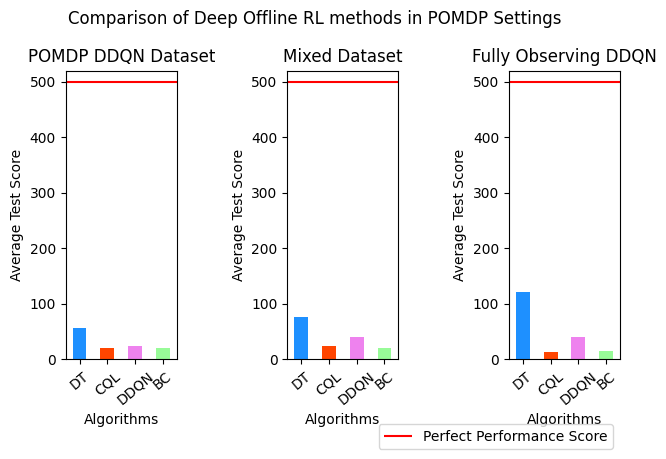

In [29]:
fig, ax = plt.subplots(1,3)

fig.suptitle("Comparison of Deep Offline RL methods in POMDP Settings")

ax[0].set_title("POMDP DDQN Dataset")
ax[1].set_title("Mixed Dataset")
ax[2].set_title("Fully Observing DDQN")
for i in range(3):

    ax[i].set_xlabel("Algorithms")
    ax[i].set_ylabel("Average Test Score")
    ax[i].set_ylim([0,520])
    ax[i].set_xlim([-1,7])
    ax[i].hlines(500,-5,8,label="Perfect Performance Score",colors=['red'])


ax[0].bar(x=[i*2 for i in range(4)], height=[np.mean(rwds_dt_10), np.mean(rwds_cql_10), np.mean(rwds_ddqn_10), np.mean(rwds_bc_10)],color=['dodgerblue','orangered','violet','palegreen'], width=1)
ax[1].bar(x =[i*2 for i in range(4)], height=[np.mean(rwds_dt_11), np.mean(rwds_cql_11), np.mean(rwds_ddqn_11), np.mean(rwds_bc_11)],color=['dodgerblue','orangered','violet','palegreen'], width=1)
ax[2].bar(x =[i*2 for i in range(4)], height=[np.mean(rwds_dt_01), np.mean(rwds_cql_01),np.mean(rwds_ddqn_01), np.mean(rwds_bc_01)],color=['dodgerblue','orangered','violet','palegreen'], width=1)

ax[0].set_xticks([i*2 for i in range(4)],['DT','CQL','DDQN','BC'], rotation=40)
ax[1].set_xticks([i*2 for i in range(4)],['DT','CQL','DDQN','BC'],rotation=40)
ax[2].set_xticks([i*2 for i in range(4)],['DT','CQL','DDQN','BC'],rotation=40)
ax[2].legend(bbox_to_anchor=(1,-0.2))

plt.tight_layout()

plt.show()

In [30]:

# code from answer here (https://stackoverflow.com/questions/57839665/how-to-set-a-openai-gym-environment-start-with-a-specific-state-not-the-env-res)
from gymnasium.envs.classic_control.cartpole import CartPoleEnv
from gym.wrappers.time_limit import TimeLimit
class ExtendedCartPole(CartPoleEnv):

    def reset_state(self, x):
        self.state=x

        self.steps_beyond_terminated=None
        return self.state
    
start_state = [0,0,0.05,0]
starting_reward = 600




trajs = []

models = [dt_11,cql_11, ddqn_11, bc_11]
def sim_trajs_dt(dtAgent):

    model_trajs = []
    env = TimeLimit(ExtendedCartPole(), 500)



    for episode in tqdm(range(100)):

        episode_reward = 0

        S, info = env.reset()  
        S = env.reset_state(start_state)

        S = S[0], S[2]
        done=False


        a_h = [[]]
        s_h = [[S]]
        r_h = [[starting_reward]]

        episode_traj = []

        while not done:
            
            r,s,a = preprocess(r_h, s_h, a_h)
            if len(a[0]) == 0:
                
                pi = dtAgent(r,s,[[np.zeros(2)]],1)
            else:
                pi = dtAgent(r,s,a,0)

            A = torch.argmax(pi).item()
            s_prime, reward, terminate, truncate, info = env.step(A)
            s_prime = s_prime[0], s_prime[2]
            done = terminate or truncate

            episode_reward+=reward
            s_h[0].append(s_prime)
            a_h[0].append(A)
            r_h[0].append(r_h[0][-1]-reward)
            episode_traj.append(s_h[0][-1][1])
        model_trajs.append(episode_traj)

    return model_trajs

def sim_trajs_d3rl_algo(agent):

    model_trajs=[]
    rewards_over_episodes = []
    for episode in tqdm(range(100)):
        episode_trajs = []
        env = TimeLimit(ExtendedCartPole(), 500)

        S, info = env.reset()
        S = env.reset_state(start_state)
        
        episode_trajs.append(S[2])
        S = S[0], S[2]
        done=False
        while not done:
            A = agent.predict(np.array([S]))

            #print(A)

            S_prime, reward, terminate, truncate, info = env.step(A[0])

            done = terminate or truncate
            S_prime = S_prime[0],S_prime[2]

            episode_trajs.append(S_prime[1])
            S = S_prime
        model_trajs.append(episode_trajs)


    return model_trajs

In [31]:
traj_bc = sim_trajs_d3rl_algo(bc_01)
traj_ddqn = sim_trajs_d3rl_algo(ddqn_01)
traj_cql = sim_trajs_d3rl_algo(cql_01)
traj_dt = sim_trajs_dt(dt_01)

100%|██████████| 100/100 [00:41<00:00,  2.39it/s]


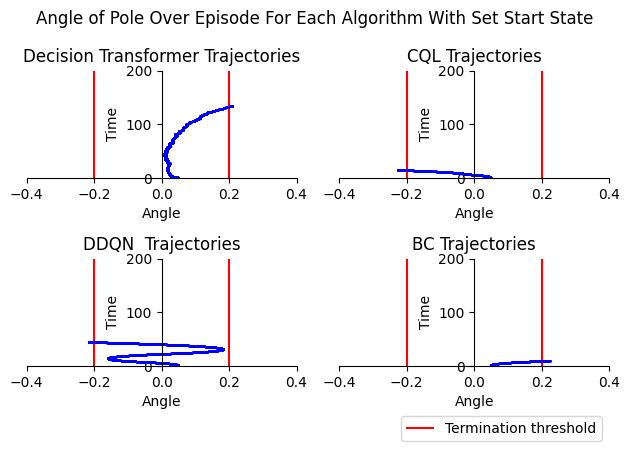

In [32]:
fig, ax = plt.subplots(2,2)
from itertools import product
for i0,i1 in product(list(range(2)), list(range(2))):
    ax[i0,i1].spines['left'].set_position('center')
    #ax[i0,i1].spines['bottom'].set_position('center')
    ax[i0,i1].spines['right'].set_color('none')
    ax[i0,i1].spines['top'].set_color('none')
    ax[i0,i1].set_xlim([-0.4,0.4])
    ax[i0,i1].set_ylim([0,200])
    ax[i0,i1].set_xlabel("Angle")
    ax[i0,i1].set_ylabel("Time")
    ax[i0,i1].vlines(x=[-0.2,0.2],ymin=0,ymax=200,label='Termination threshold',colors=['red','red'])
   
fig.suptitle("Angle of Pole Over Episode For Each Algorithm With Set Start State")
ax[0,0].set_title('Decision Transformer Trajectories')
ax[0,1].set_title('CQL Trajectories')
ax[1,0].set_title('DDQN  Trajectories')
ax[1,1].set_title('BC Trajectories')
ax[1,1].legend(bbox_to_anchor=(1,-0.4))

for traj in traj_dt:
    ax[0,0].plot(traj,np.linspace(0,len(traj),len(traj)),alpha=0.3,color='blue')
for traj in traj_cql:
    ax[0,1].plot(traj, np.linspace(0,len(traj),len(traj)), alpha=0.3,color='blue')
for traj in traj_ddqn:
    ax[1,0].plot(traj, np.linspace(0,len(traj),len(traj)),alpha=0.3,color='blue')
for traj in traj_bc:
    ax[1,1].plot(traj, np.linspace(0,len(traj),len(traj)),alpha=0.3,color='blue')
plt.tight_layout()
plt.show()